In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

%matplotlib inline

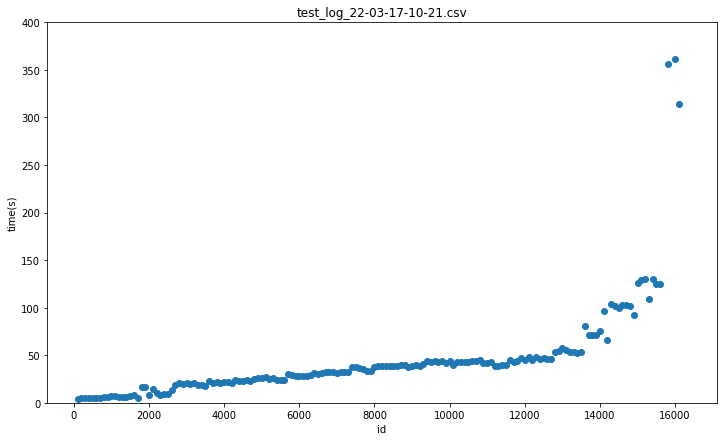

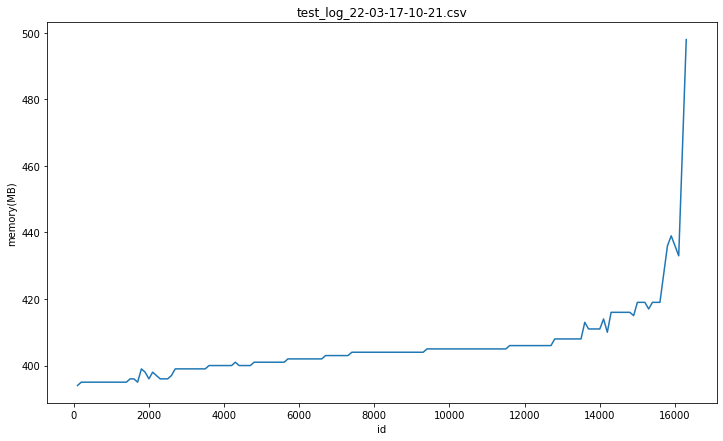

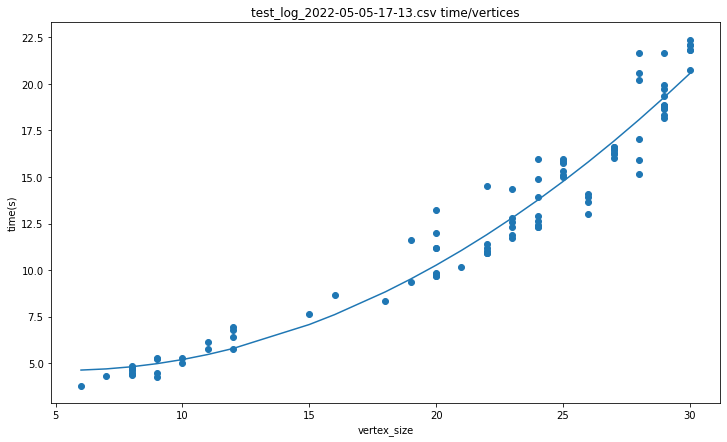

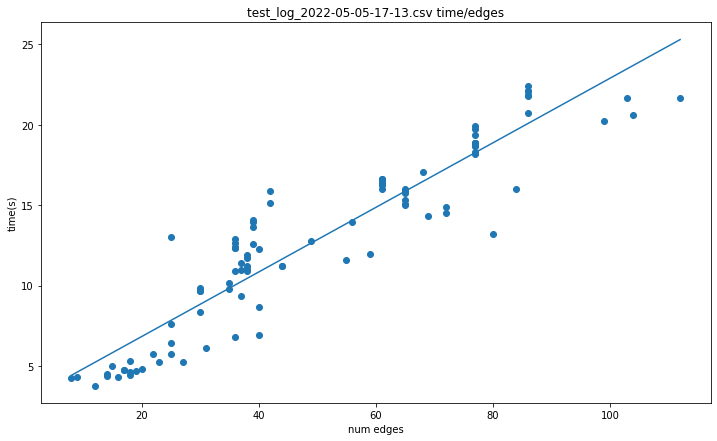

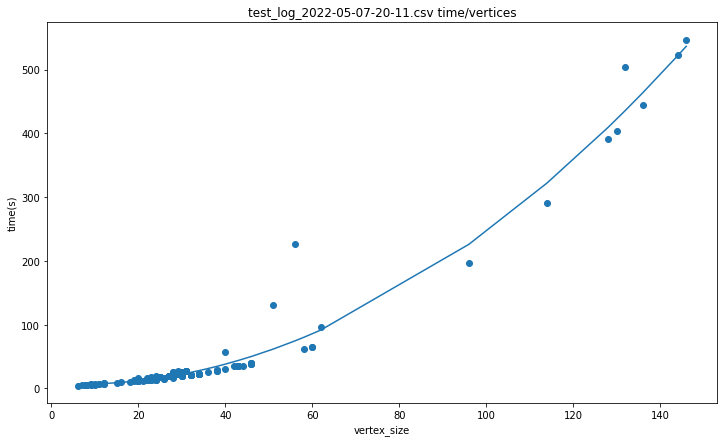

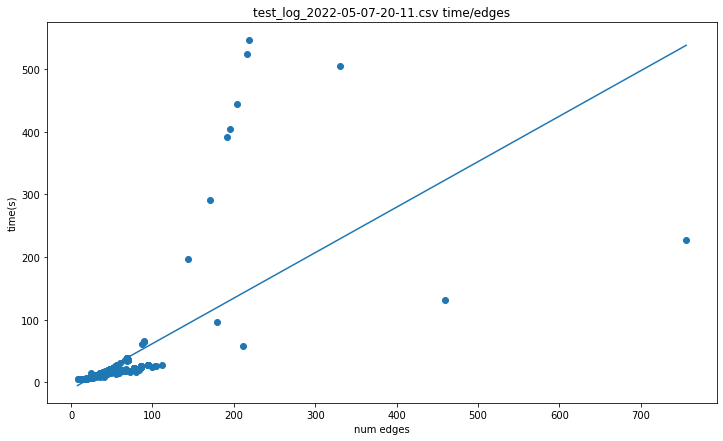

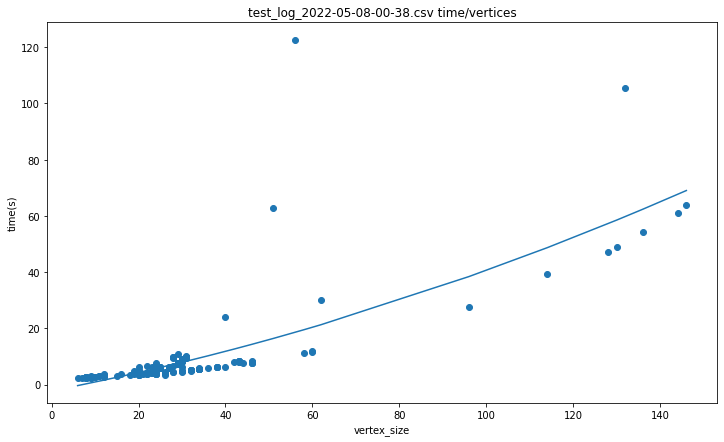

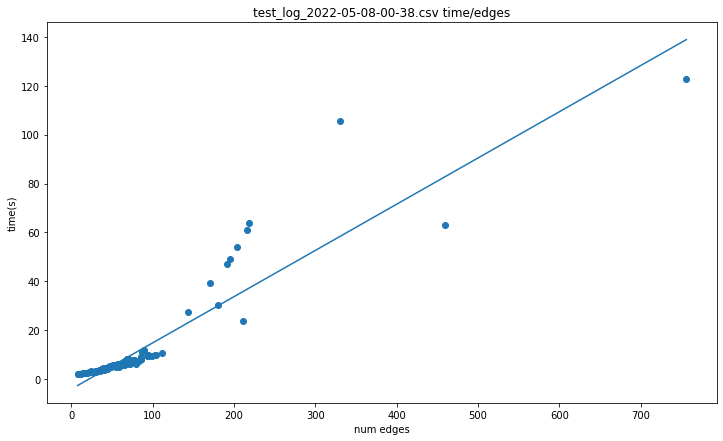

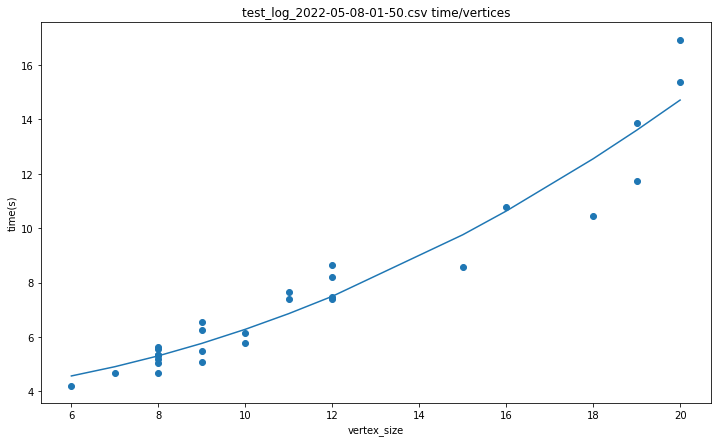

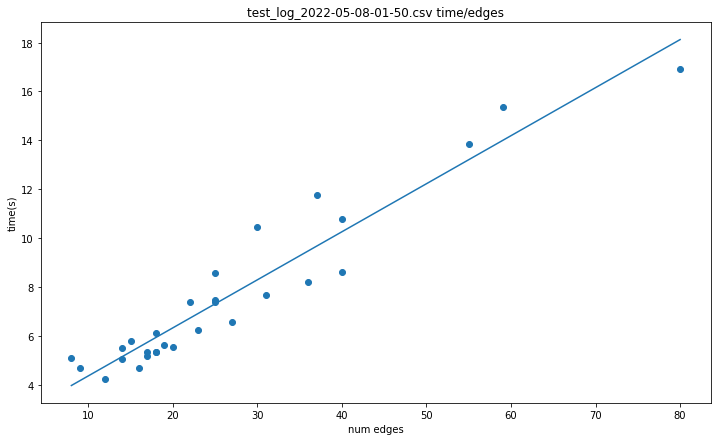

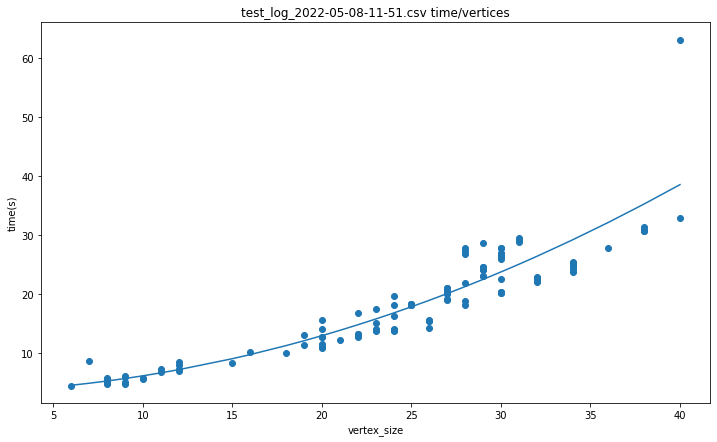

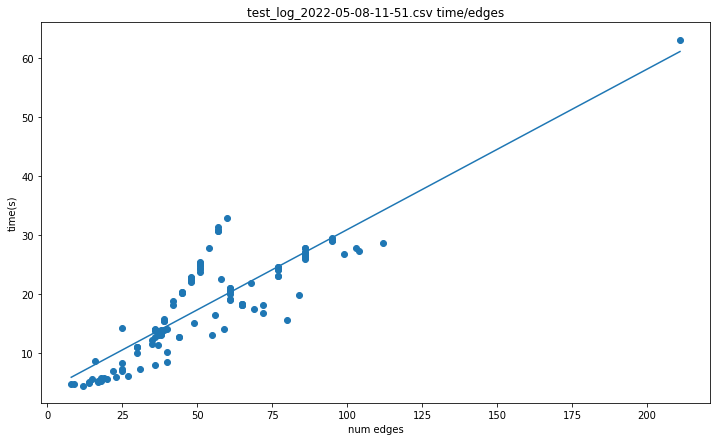

In [8]:
tests = []

for filename in os.listdir(os.getcwd() + "/tests"):
    match = re.search("\.csv$", filename)
    if match:
        tests.append(filename)

df = pd.read_csv(os.getcwd() + "/tests/" + tests[0])


plt.figure(figsize=(12,7))
plt.scatter(df['id'], df['time(s)'])
plt.xlabel('id')
plt.ylabel('time(s)')
plt.ylim([0, 400])
plt.title(tests[0])
plt.show()

plt.figure(figsize=(12,7))
plt.plot(df['id'], df['memory(MB)'])
plt.xlabel('id')
plt.ylabel('memory(MB)')
plt.title(tests[0])
plt.show()

for test in tests[1:]:
    df = pd.read_csv(os.getcwd() + "/tests/" + test)
    df = df.sort_values(by='vertex_size')

    vert = df['vertex_size']
    y = df['time']

    # Fit a polynomial to the data
    p_2 = poly.polyfit(vert, y, 2)
    quad_y = poly.polyval(vert, p_2)

    plt.figure(figsize=(12,7))
    plt.scatter(vert, y)
    plt.plot(vert, quad_y)
    plt.xlabel('vertex_size')
    plt.ylabel('time(s)')
    plt.title(test + " time/vertices")
    plt.show()

    df = df.sort_values(by='edge_size')
    edges = df['edge_size']
    y = df['time']

    p_3 = poly.polyfit(edges, y, 1)
    y_3 = poly.polyval(edges, p_3)

    plt.figure(figsize=(12,7))
    plt.scatter(edges, y)
    plt.plot(edges, y_3)
    plt.xlabel('num edges')
    plt.ylabel('time(s)')
    plt.title(test + " time/edges")
    plt.show()
